<a href="https://colab.research.google.com/github/aadityadamle/Hotel-Reviews-Classification/blob/main/Hotel_Reviews_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [2]:
!wget https://raw.githubusercontent.com/aadityadamle/Hotel-Reviews-Classification/main/tripadvisor_hotel_reviews.csv

--2021-02-07 11:58:17--  https://raw.githubusercontent.com/aadityadamle/Hotel-Reviews-Classification/main/tripadvisor_hotel_reviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14966021 (14M) [text/plain]
Saving to: ‘tripadvisor_hotel_reviews.csv’

tripadvisor_hotel_r 100%[===================>]  14.27M  45.5MB/s    in 0.3s    

2021-02-07 11:58:18 (45.5 MB/s) - ‘tripadvisor_hotel_reviews.csv’ saved [14966021/14966021]



Dataset Source: https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews

In [3]:
data = pd.read_csv("/content/tripadvisor_hotel_reviews.csv")
print(data.head())

                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


In [4]:
print(data.shape)
data.columns

(20491, 2)


Index(['Review', 'Rating'], dtype='object')

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64


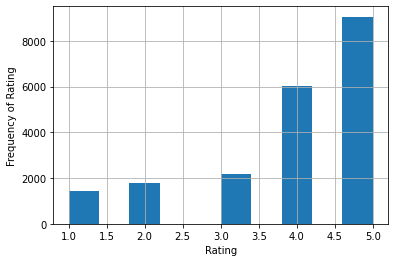

In [5]:
#Observe classes
classes = data["Rating"]
print(classes.value_counts())
classes.hist()
plt.xlabel("Rating")
plt.ylabel("Frequency of Rating")
plt.show()

In [6]:
# Print first 10 reviews of the series
reviews = data["Review"]
print(reviews[:10])

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms not 4* experience hotel monaco seat...
3    unique, great stay, wonderful time hotel monac...
4    great stay great stay, went seahawk game aweso...
5    love monaco staff husband stayed hotel crazy w...
6    cozy stay rainy city, husband spent 7 nights m...
7    excellent staff, housekeeping quality hotel ch...
8    hotel stayed hotel monaco cruise, rooms genero...
9    excellent stayed hotel monaco past w/e delight...
Name: Review, dtype: object


In [7]:
#Remove punctuations and sysmbols
reviews = reviews.str.replace(r"[^A-Za-z]", " ")
print(reviews[:10])

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms not    experience hotel monaco seat...
3    unique  great stay  wonderful time hotel monac...
4    great stay great stay  went seahawk game aweso...
5    love monaco staff husband stayed hotel crazy w...
6    cozy stay rainy city  husband spent   nights m...
7    excellent staff  housekeeping quality hotel ch...
8    hotel stayed hotel monaco cruise  rooms genero...
9    excellent stayed hotel monaco past w e delight...
Name: Review, dtype: object


In [8]:
#Convert to lowercase
reviews = reviews.str.lower()
print(reviews[:10])

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms not    experience hotel monaco seat...
3    unique  great stay  wonderful time hotel monac...
4    great stay great stay  went seahawk game aweso...
5    love monaco staff husband stayed hotel crazy w...
6    cozy stay rainy city  husband spent   nights m...
7    excellent staff  housekeeping quality hotel ch...
8    hotel stayed hotel monaco cruise  rooms genero...
9    excellent stayed hotel monaco past w e delight...
Name: Review, dtype: object


In [9]:
#download stopwords
nltk.download("stopwords")
# Import and set the English stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
reviews = reviews.apply(lambda x : " ".
                        join(word for word in x.split()
                         if word not in stop_words)) 
print(reviews[:10])

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms experience hotel monaco seattle goo...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay went seahawk game awesom...
5    love monaco staff husband stayed hotel crazy w...
6    cozy stay rainy city husband spent nights mona...
7    excellent staff housekeeping quality hotel cho...
8    hotel stayed hotel monaco cruise rooms generou...
9    excellent stayed hotel monaco past w e delight...
Name: Review, dtype: object


In [11]:
#Create and porterstemmer object on reviews
ps = nltk.PorterStemmer()

reviews = reviews.apply(lambda x : " ".
                        join(ps.stem(word) 
                        for word in x.split()))
print(reviews[:10])

0    nice hotel expens park got good deal stay hote...
1    ok noth special charg diamond member hilton de...
2    nice room experi hotel monaco seattl good hote...
3    uniqu great stay wonder time hotel monaco loca...
4    great stay great stay went seahawk game awesom...
5    love monaco staff husband stay hotel crazi wee...
6    cozi stay raini citi husband spent night monac...
7    excel staff housekeep qualiti hotel chock staf...
8    hotel stay hotel monaco cruis room gener decor...
9    excel stay hotel monaco past w e delight recep...
Name: Review, dtype: object


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df= 20,
                             ngram_range=(1,2),
                             sublinear_tf = True,)

In [13]:
X = vectorizer.fit_transform(reviews)

In [14]:
print(vectorizer.get_feature_names())

['aaa', 'abc', 'abc store', 'abil', 'abit', 'abl', 'abl book', 'abl check', 'abl eat', 'abl enjoy', 'abl leav', 'abl make', 'abl room', 'abl sleep', 'abl stay', 'abl use', 'abl walk', 'abroad', 'absolut', 'absolut amaz', 'absolut beauti', 'absolut best', 'absolut fabul', 'absolut fantast', 'absolut gorgeou', 'absolut great', 'absolut love', 'absolut noth', 'absolut perfect', 'absolut recommend', 'absolut stay', 'absolut wonder', 'absolutley', 'absolutli', 'abund', 'ac', 'ac work', 'accademia', 'accent', 'accept', 'accept room', 'access', 'access avail', 'access beach', 'access citi', 'access free', 'access great', 'access hotel', 'access internet', 'access lobbi', 'access metro', 'access room', 'accid', 'accident', 'accomad', 'accomid', 'accommod', 'accommod room', 'accomod', 'accomod room', 'accompani', 'accord', 'accordingli', 'account', 'accross', 'accur', 'accustom', 'ach', 'achiev', 'acknowledg', 'act', 'act like', 'action', 'activ', 'activ beach', 'activ day', 'activ go', 'activ 

In [15]:
print(len(vectorizer.get_feature_names()))

14978


In [16]:
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
y = data["Rating"]
print(y)

0        4
1        2
2        3
3        5
4        5
        ..
20486    5
20487    4
20488    2
20489    1
20490    2
Name: Rating, Length: 20491, dtype: int64


In [18]:
pip install imbalanced-learn

In [19]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [20]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy="not majority")

In [21]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [22]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X_over, y_over, test_size = 0.25, random_state = 42)

In [23]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()

In [24]:
classifier.fit(Train_X,Train_Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [25]:
prediction = classifier.predict(Test_X)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("LinearSVC Accuracy score is ",accuracy_score(prediction, Test_Y)*100)

LinearSVC Accuracy score is  86.48171054956705


In [27]:
pd.DataFrame(
    confusion_matrix(Test_Y, prediction),
    index = [['actual', 'actual','actual', 'actual','actual'], ['1', '2', '3', '4', '5']],
    columns = [['predicted', 'predicted', 'predicted', 'predicted', 'predicted'], ['1', '2', '3', '4', '5']])

predicted                        
                 1     2     3     4     5
actual 1      2281    22     0     2     0
       2         8  2168    14    11     2
       3        22    26  2091    52     9
       4         7    54   181  1550   507
       5         7    21    73   512  1698